In [132]:
## importing laibaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
## loading data set
df=pd.read_csv('gas_turbines.csv')

In [134]:
## checking shape of the dataset
df.shape

(15039, 11)

In [135]:
## checking the data set
df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


## From our problem statement ambient varibles are features and turbine energy yield is target so we drop others column !

In [136]:
df1=df.drop(['GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)

In [137]:
df1.head()

,AT,AP,AH,AFDP,TEY
0,6.8594,1007.9,96.799,3.5000,114.70
1,6.7850,1008.4,97.118,3.4998,114.72
2,6.8977,1008.8,95.939,3.4824,114.71
3,7.0569,1009.2,95.249,3.4805,114.72
4,7.3978,1009.7,95.150,3.4976,114.72


## EDA & Visualization.

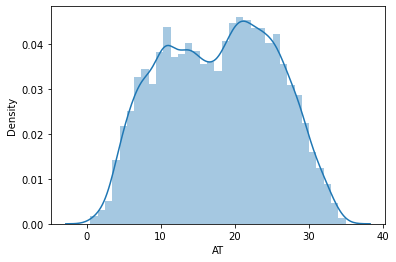

In [138]:
## Histogram
sns.distplot(df1['AT'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='AT'>

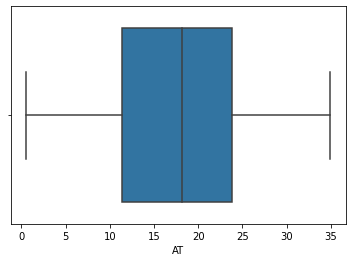

In [139]:
## boxplot for AT
sns.boxplot(df1['AT'])

<AxesSubplot:xlabel='AP', ylabel='Density'>

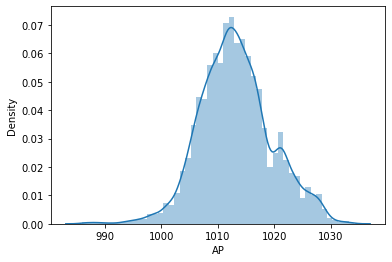

In [140]:
## histogram for AP
sns.distplot(df1['AP'])

<AxesSubplot:xlabel='AP'>

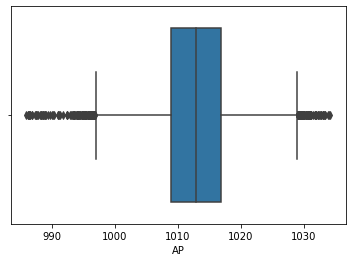

In [141]:
sns.boxplot(df1['AP'])

### Outliers are observed so we need to deal with them !

In [142]:
## Function to find wishker
def outliers(df1, feature):
    Q1= df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df1, "AP")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  1028.9
Lower Whisker:  996.9


In [143]:
## to find outliers
df1[(df1['AP'] < lower) | (df1['AP'] > upper)].shape

(214, 5)

In [144]:
## Droping outliers
df2= df1[(df1['AP'] > lower) & (df1['AP'] < upper)]

In [145]:
df2.shape

(14818, 5)

<AxesSubplot:xlabel='AP'>

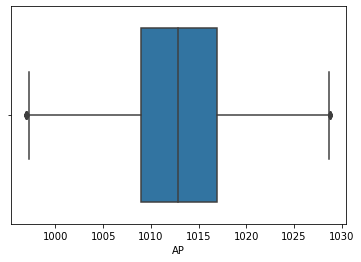

In [146]:
## boxplot
sns.boxplot(df2['AP'])

<AxesSubplot:xlabel='AH'>

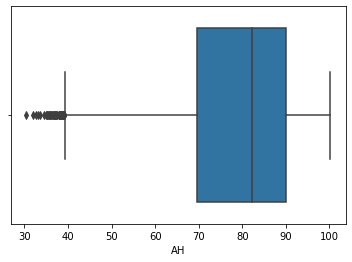

In [147]:
## checking for the AH
sns.boxplot(df2['AH'])

In [148]:
## Function to find wishker
def outliers(df2, feature):
    Q1= df2[feature].quantile(0.25)
    Q3 = df2[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df2, "AH")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  120.56500000000001
Lower Whisker:  39.21499999999999


In [149]:
## to find outliers
df2[(df2['AH'] < lower) | (df2['AH'] > upper)].shape

(55, 5)

In [150]:
## Droping outliers
df3= df2[(df2['AH'] > lower) & (df2['AH'] < upper)]

In [151]:
df3.shape

(14763, 5)

<AxesSubplot:xlabel='AH'>

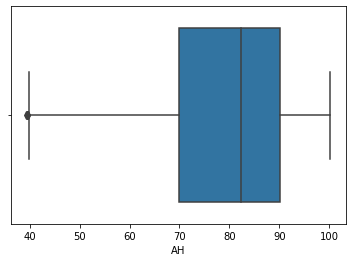

In [152]:
sns.boxplot(df3['AH'])

<AxesSubplot:xlabel='AFDP'>

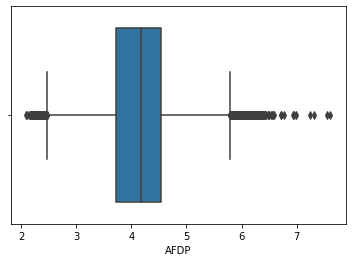

In [153]:
## checking for the AFDP
sns.boxplot(df3['AFDP'])

In [154]:
## Function to find wishker
def outliers(df3, feature):
    Q1= df3[feature].quantile(0.25)
    Q3 = df3[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df3, "AFDP")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  5.7928000000000015
Lower Whisker:  2.4707999999999988


In [155]:
## to find outliers
df3[(df3['AFDP'] < lower) | (df3['AFDP'] > upper)].shape

(683, 5)

In [156]:
## Droping outliers
df4= df3[(df3['AFDP'] > lower) & (df3['AFDP'] < upper)]

In [157]:
df4.shape

(14080, 5)

<AxesSubplot:xlabel='AFDP'>

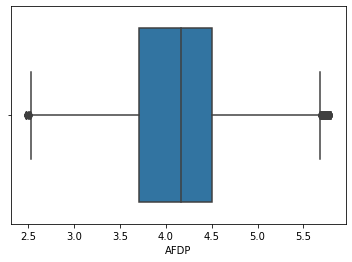

In [158]:
sns.boxplot(df4['AFDP'])

<AxesSubplot:xlabel='TEY'>

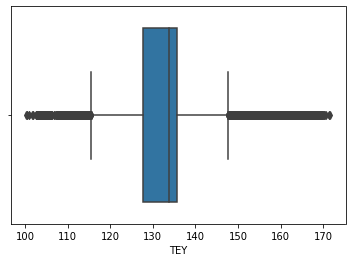

In [159]:
## Checking for TEY
sns.boxplot(df4['TEY'])

In [160]:
## Function to find wishker
def outliers(df4, feature):
    Q1= df4[feature].quantile(0.25)
    Q3 = df4[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df4, "TEY")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  147.7
Lower Whisker:  115.54


In [161]:
## to find outliers
df4[(df4['TEY'] < lower) | (df4['TEY'] > upper)].shape

(5309, 5)

In [162]:
## as outliers are more so they are replace with mean
Q1 = df4['TEY'].quantile(0.25)
Q3 = df4['TEY'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +( whisker_width*IQR)
df4['TEY']=np.where(df4['TEY']>upper_whisker,upper_whisker,np.where
                      (df4['TEY']<lower_whisker,lower_whisker,df4['TEY']))

<AxesSubplot:xlabel='TEY'>

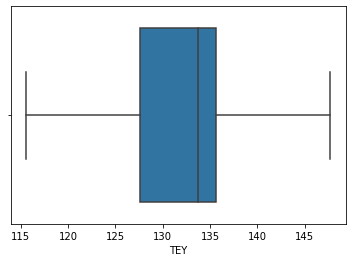

In [163]:
## Checking for TEY
sns.boxplot(df4['TEY'])

<AxesSubplot:xlabel='TEY', ylabel='Density'>

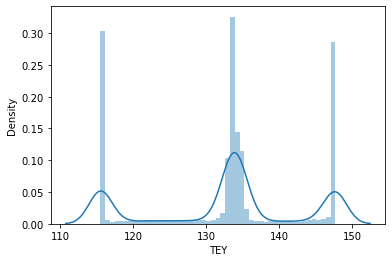

In [164]:
sns.distplot(df4['TEY'])

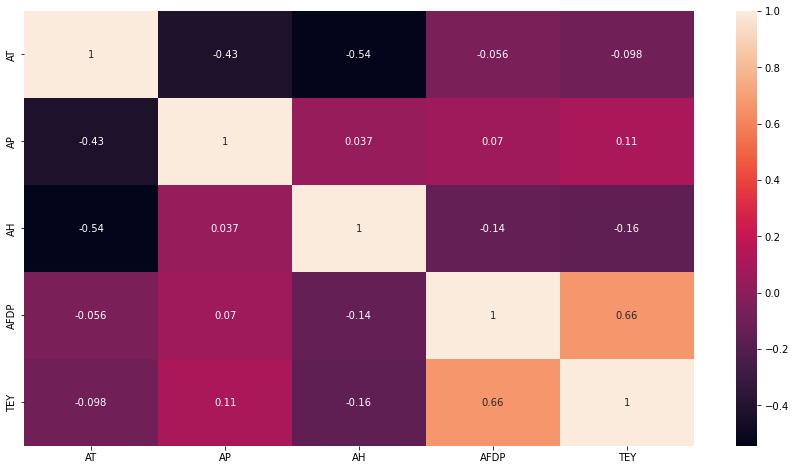

In [165]:
## Heat map
plt.figure(figsize=(15,8))
sns.heatmap(df4.corr(),annot=True)
plt.show()

## all outliers are removed !

In [166]:
## Distributed features ad target value.
X=df4.drop(['TEY'],axis=1)
Y=df4['TEY']

In [167]:
from sklearn.preprocessing import StandardScaler
stc= StandardScaler()

In [168]:
x=stc.fit_transform(X)

In [169]:
pd.DataFrame(x).describe()

,0,1,2,3
count,1.408000e+04,1.408000e+04,1.408000e+04,1.408000e+04
mean,-1.010713e-16,2.263907e-14,3.294398e-16,-3.125025e-16
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-2.329850e+00,-2.748396e+00,-2.926389e+00,-2.541225e+00
25%,-8.257157e-01,-6.975231e-01,-6.918126e-01,-6.586658e-01
50%,7.140733e-02,-7.502694e-02,2.231130e-01,3.153602e-02
75%,8.066854e-01,5.979419e-01,7.972808e-01,5.409209e-01
max,2.242029e+00,2.616848e+00,1.551323e+00,2.511605e+00


## Model building

In [170]:
# Importing the laibaries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop 
from keras.callbacks import EarlyStopping

In [171]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [172]:
x_train.shape,Y_train.shape

((9856, 4), (9856,))

### Creating model

In [174]:
import tensorflow as tf
model = Sequential()
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=20, activation='tanh'))
model.add(Dense(units=20, activation='softmax'))

In [175]:
model.compile(
   loss = 'mse', 
   optimizer = RMSprop(), 
   metrics = ['mean_absolute_error']
)

### Fitting model.

In [176]:
model.fit(
x_train, Y_train,    
   batch_size=120, 
   epochs = 500, 
   verbose = 1, validation_split = 0.2,
   callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)]
)

Epoch 1/500
66/66 [==============================] - 0s 2ms/step - loss: 17685.0742 - mean_absolute_error: 132.5511 - val_loss: 17707.5723 - val_mean_absolute_error: 132.6452
Epoch 2/500
66/66 [==============================] - 0s 1ms/step - loss: 17685.0703 - mean_absolute_error: 132.5511 - val_loss: 17707.5723 - val_mean_absolute_error: 132.6452
Epoch 3/500
66/66 [==============================] - 0s 1ms/step - loss: 17685.0723 - mean_absolute_error: 132.5511 - val_loss: 17707.5703 - val_mean_absolute_error: 132.6452
Epoch 4/500
66/66 [==============================] - 0s 1ms/step - loss: 17685.0703 - mean_absolute_error: 132.5511 - val_loss: 17707.5703 - val_mean_absolute_error: 132.6452
Epoch 5/500
66/66 [==============================] - 0s 2ms/step - loss: 17685.0723 - mean_absolute_error: 132.5511 - val_loss: 17707.5723 - val_mean_absolute_error: 132.6452
Epoch 6/500
66/66 [==============================] - 0s 1ms/step - loss: 17685.0723 - mean_absolute_error: 132.5511 - val_los

In [178]:
## Accuracy of the model
score = model.evaluate(x_test, Y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 17677.662109375
Test accuracy: 132.53265380859375


In [179]:
## Predicting the deat data
y_pred=model.predict(x_test)
print(y_pred)

[[0.05003607 0.04989262 0.05003644 ... 0.05054918 0.05000737 0.05038926]
 [0.05002242 0.04997637 0.05004805 ... 0.05013013 0.05001693 0.05007436]
 [0.05003177 0.04986574 0.04998048 ... 0.0505515  0.05016634 0.05027731]
 ...
 [0.04996252 0.04992205 0.05015253 ... 0.05041464 0.04997351 0.05021112]
 [0.04998582 0.04993647 0.05004789 ... 0.05028379 0.05007574 0.05012744]
 [0.04997327 0.0498673  0.04993718 ... 0.05037633 0.05011049 0.05023555]]


# Our model's Mean absolute error is 132.53